# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
from typing import List, Tuple, Dict, Callable

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

1. Follow the pseudocode in the book exactly.
2. Learn about the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem).


These links are to help me navigate your notebook:

1. [Four Color Connecticut](#four_ct)
2. [Three Color Connecticut](#three_ct)
3. [Four Color Europe](#four_eu)
4. [Three Color Europe](#three_eu)


## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using at most four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140),
                 (104, 77), (197, 94), (123, 142)],
    'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4),
           (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
print(connecticut)

{'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140), (104, 77), (197, 94), (123, 142)], 'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4), (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)], 'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland', 'New Haven', 'New London', 'Hartford']}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>Do not use NetworkX nodes as the data structure for your assignment.
    We are only using it to color the maps.
    Use basic Python data structures as specified in the general programming requirements.</p>
</div>


In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

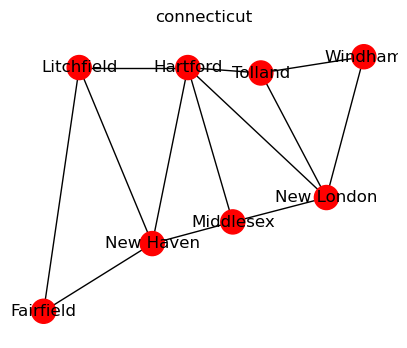

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. Look at the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You *must* implement **Degree Heuristic** (to pick variables) and **Least Constraining Value** (to pick values).
You *may* implement **Minimum Remaining Values** as a tie breaker, if you like.
Otherwise, break ties in ascending order (least to most).
(Which functions in the pseudocode represent the heuristics?).

You should get the backtracking and forward checking implemented first. 
Then add the heuristics. 
You must use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. 
When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

```
Required:
    backtracking: YES
    forward checking: YES
    degree heuristic: YES
    least contraining value: YES
Optional:    
    minimum remaining values: MAYBE (I think this is implicit with my sorted list implementation)
```  

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`.

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement):

1. The variable selected and why.
2. The values proposed in order.
3. backtracking detected by forward checking (empty domains).

Don't print out a lot of noise.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

In [5]:
def color_map(planar_map, color_list, trace=False):
    return [(n, "red") for n in planar_map["nodes"]]

Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Functions

<a id="get_neighbors"></a>
### get_neighbors

`get_neighbors` returns the list of neighbors and neighbor indices for a given variable. **Used by**: [degree_heuristic](#degree_heuristic),[LCV](#LCV), [backtrack](#backtrack)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **var**: Str: Current variable under consideration, in string form

**returns** neighbor, neighbor_indices: List of neighbors (string names) and neighbor indices (int)

In [6]:
def get_neighbors(csp: Dict, var: str): 
    neighbors, neighbor_indices = [], []
    index = csp['nodes'].index(var)
    
    for i in csp['edges']: 
        if i[0] == index: 
            neighbor_indices.append(i[1])
            neighbors.append(csp['nodes'][i[1]])
        if i[1] == index: 
            neighbor_indices.append(i[0])
            neighbors.append(csp['nodes'][i[0]])
            
    return neighbors, neighbor_indices

In [7]:
# Unit Tests / Assertions 
test_dict = {
    'edges': [(0, 1), (0, 2)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield']}
neighbors, indices = get_neighbors(test_dict, 'Fairfield')
assert neighbors == ['Windham', 'Litchfield']
assert indices == [1, 2]
assert len(indices) == 2

<a id="degree_heuristic"></a>
### degree_heuristic

`degree_heuristic` takes in the csp and running list of (variable, value) assignments. This iterates through the available variables and picks the one with the most neighbors after sorting the list. **Used by**: [backtrack](#backtrack)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **assignments**: List[Tuple]]: Running assignments of (variable, value)
* **trace**: Boolean: Whether to print out trace / debugging statements

**returns** sorted_choices[-1]: list of available variables, sorted by number of neighbors in ascending order, returning the highest

In [8]:
def degree_heuristic(csp: Dict, assignments: List[Tuple], trace:bool=False):
    
    choices = deepcopy(csp['nodes'])  
    for i in assignments: #for node in assignments
        if i[0] in choices: 
            choices.remove(i[0]) #remaining choices, not in assignments

    deg_count = {}
    for node in choices: 
        neighbors, neighbor_indices = get_neighbors(csp, node) #init
        deg_count[node] = len(neighbor_indices)
    sorted_choices = sorted(choices, key=lambda node: deg_count[node])

    print('Selecting ', sorted_choices[-1], ' with degree count ', deg_count[sorted_choices[-1]]) if trace else None

    return sorted_choices[-1]

In [9]:
# Unit Tests / Assertions
test_dict = {
    'edges': [(0, 2), (0, 5)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
assert degree_heuristic(test_dict, []) == 'Fairfield'
test_dict = {
    'edges': [(0, 2), (0, 5), (1,5), (2,5)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
assert degree_heuristic(test_dict, []) == 'New Haven'
assert degree_heuristic(test_dict, [('New Haven', 'red')]) == 'Litchfield'

<a id="LCV"></a>
### LCV

`LCV` calculates the least constraining value, and outputs a sorted domain. **Used by**: [backtrack](#backtrack)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **assignments**: List[Tuple]]: Running assignments of (variable, value)
* **trace**: Boolean: Whether to print out trace / debugging statements

**returns** sorted_domain: List of available values, sorted by least constraining (ascending order)

In [10]:
def LCV(csp: Dict, var: str, assignments: List[Tuple], trace:bool=False): #Least Constraining Value - pick value (color)
    index = csp['nodes'].index(var)
    neighbors, neighbor_indices = get_neighbors(csp, var) 
    domain = csp['domains'][index]
    
    overlap_count = {}
    for color in domain: 
        overlap_count[color] = 0 #init
        for neighbor in neighbor_indices: # for each neighbor
            for value in csp['domains'][neighbor]: #for each value in neighbor domain 
                if value == color: 
                    overlap_count[color] += 1
    sorted_domain = sorted(domain, key=lambda color: overlap_count[color]) 

    if trace: 
        print('Proposed Values, soted by least constraining: ', sorted_domain)
    
    return sorted_domain

In [11]:
# Unit Tests / Assertions
test_dict = {
    'edges': [(0, 1), (0, 2)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield'],
    'domains': [('red', 'blue'), ('red', 'green'), ('red', 'yellow')]}
test_lcv = LCV(test_dict, 'Fairfield', [])
assert test_lcv[0] == 'blue'
assert test_lcv[1] == 'red'
assert test_lcv == ['blue', 'red']

<a id="consistent"></a>
### consistent

`consistent` Checks if a given (variable, value) combination is consistent with the constraints (no two neighbors can have same color) **Used by**: [backtrack](#backtrack)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **var**: Str: Current variable under consideration, in string form
* **value**: Str: Current color under consideration, for the associated value
* **assignments**: List[Tuple]]: Running assignments of (variable, value) 

**returns** True / False - whether the (variable, value) is consistent with constraints

In [12]:
def consistent(csp: Dict, var: str, value: str, assignments: List[Tuple]): 

    index = csp['nodes'].index(var) #get node index
    neighbors, indices = get_neighbors(csp, var) #get neighbors
    for i in assignments: # tuple(node, color)
        if i[0] in neighbors: #node in neighbors
            if i[1] == value: #color is assigned to neighbor
                return False
                
    return True

In [13]:
# Unit Tests / Assertions
test_dict = {
    'edges': [(0, 1), (0, 2)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield']}
assert consistent(test_dict, 'Fairfield', 'red', []) == True
assert consistent(test_dict, 'Fairfield', 'red', [('Windham', 'red')]) == False
assert consistent(test_dict, 'Fairfield', 'red', [('Windham', 'blue')]) == True

<a id="revise_domains"></a>
### revise_domains

`revise_domains` Checks if a given pair of variables have overlapping domains. If the value under consideration for Xi is in the domain of Xj, it is removed. **Used by**: [forward_check](#forward_check)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **xi**: Int: Variable index under consideration
* **xj**: Int: Variable index neighboring xi
* **value**: Str: Current color under consideration, for the associated value

**returns** False if domain is not revised, True otherwise

In [14]:
def revise_domains(csp: Dict, xi: int, xj: int, value: str): 
    
    revised = False
    Di, Dj = csp['domains'][xi], csp['domains'][xj]
    
    if value in Dj: 
        domain = deepcopy(csp['domains'][xj])
        domain.remove(value)
        csp['domains'][xj] = domain
        revised = True
    
    return revised

In [15]:
# Unit Tests / Assertions
test_dict = {
    'edges': [(0, 1), (0, 2)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield'],
    'domains': [['red', 'blue'], ['red', 'green'], ['red', 'yellow']]}

revise_domains(test_dict, 0, 1, 'red')
assert test_dict['domains'][1] == ['green']
assert test_dict['domains'][2] == ['red', 'yellow']
assert test_dict['domains'][0] == ['red', 'blue']

<a id="forward_check"></a>
### forward_check

`forward_check` performs forward checking on a given (variable, value) pair. This generates a queue of neighbors, and iteratively checks/revises their domains. If a domain is left at length = 0, an error is thrown allowing backtrack to progress back up the search.  **Used by**: [backtrack](#backtrack)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **var**: Str: Current variable under consideration, in string form
* **value**: Str: Current color under consideration, for the associated value
* **assignments**: List[Tuple]]: Running assignments of (variable, value) 

**returns** False if domain is left at Length 0, True otherwise

In [16]:
def forward_check(csp: Dict, var: str, value: str, assignments: List[Tuple], trace:bool=False): 
    
    #Get neighbor arcs
    neighbors, neighbor_indices = get_neighbors(csp, var)
    index = csp['nodes'].index(var)
    queue = []
    for i in neighbor_indices: 
        queue.append((index, i))

    while queue: 
        xi, xj = queue.pop()
        
        revised = revise_domains(csp, xi, xj, value)
        if revised: #true
            if len(csp['domains'][xj]) == 0: #empty domain
                print('Empty domain found...backtracking...') if trace else None
                return False
    return True

In [17]:
# Unit Tests / Assertions
test_dict = {
    'edges': [(0, 1), (0, 2)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield'],
    'domains': [['red', 'blue', 'yellow'], ['red'], ['red', 'yellow']]}

assert forward_check(deepcopy(test_dict), 'Fairfield', 'red', []) == False
assert forward_check(deepcopy(test_dict), 'Fairfield', 'blue', []) == True
assert forward_check(deepcopy(test_dict), 'Fairfield', 'yellow', []) == True

<a id="backtrack"></a>
### backtrack

`backtrack` performs the main backtrack search function, taking in the constraint satisfaction problem (csp) and running list of assignments in (variable, value) form. This calls `degree_heuristic` to select a variable, and `LCV` to select a value set for that variable. This follows the pseudocode in the book. Unit Tests / Assertions are covered in the Problems below, and not included here. **Used by**: [backtracking_search](#backtracking_search)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **assignments**: List[Tuple]]: Running assignments of (variable, value)
* **trace**: Boolean: Whether to print out trace / debugging statements


**returns** 'Failure' if backtrack fails, allowing the search to progress; calls another backtrack otherwise

In [18]:
def backtrack(csp: Dict, assignments: List[Tuple], trace:bool=False): 
    if len(assignments) == len(csp['nodes']): #check if assignments complete
        return assignments
    var = degree_heuristic(csp, assignments, trace) #pick variable (node) with degree heuristic
    
    for value in LCV(csp, var, assignments, trace): #color 
        if consistent(csp, var, value, assignments): 
            assignments.append((var, value)) #add var to assignments
            print('Assignment made: ', var, ', ', value) if trace else None
            orig_domains = deepcopy(csp['domains'])
            
            fwd_check = forward_check(csp, var, value, assignments, trace) #ADJUSTING
            if fwd_check != False: #no inconsistencies found
                result = backtrack(csp, assignments, trace)
                if result != 'Failure': 
                    return result
                csp['domains'] = orig_domains #remove inf
            assignments.remove((var, value))
    return 'Failure'

<a id="backtracking_search"></a>
### backtracking_search

`backtracking_search` performs the recursive call for `backtrack`. Unit Tests / Assertions are covered in the Problems below, and not included here. **Used by**: [color_map](#color_map)

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **trace**: Boolean: Whether to print out trace / debugging statements


**returns** backtrack call

In [19]:
def backtracking_search(csp: Dict, trace:bool=False): 
    return backtrack(csp, [], trace)

<a id="color_map"></a>
### color_map

`color_map` is the primary requested function. It adds a 'domain' field to the provided constraint satisfaction problem (csp) `planar_map` then calls the `backtracking_search` function. It then orders the result in the same order as the original CSP before outputting the sorted values. Unit Tests / Assertions are covered in the Problems below, and not included here. 

***Inputs:***
* **csp**: Dict: Constraint satisfied problem dictionary (map in this case)
* **color_list**: List[str]: List of potential colors (values) to use for each variable
* **trace**: Boolean: Whether to print out trace / debugging statements

**returns** list of color assignments, sorted the same as original csp (planar_map)

In [20]:
def color_map(planar_map: Dict, color_list: List[str], trace=False):
    
    planar_map['domains'] = [color_list for each in planar_map['nodes']] #add domains to dict
    ans = backtracking_search(planar_map, trace) #Call backtracking

    if ans == 'Failure':
        print('No solution could be found with the given constraints')
        return None
    
    #order answer
    order = {}
    for i in ans: 
        order[i] = planar_map['nodes'].index(i[0])
    sorted_ans = sorted(ans, key=lambda i: order[i], reverse=False)

    return sorted_ans

## Problem 1. Color Connecticut Using Your Solution

In [21]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Selecting  Hartford  with degree count  5
Proposed Values, soted by least constraining:  ['red', 'blue', 'green', 'yellow']
Assignment made:  Hartford ,  red
Selecting  New London  with degree count  4
Proposed Values, soted by least constraining:  ['blue', 'green', 'yellow']
Assignment made:  New London ,  blue
Selecting  New Haven  with degree count  4
Proposed Values, soted by least constraining:  ['blue', 'green', 'yellow']
Assignment made:  New Haven ,  blue
Selecting  Tolland  with degree count  3
Proposed Values, soted by least constraining:  ['green', 'yellow']
Assignment made:  Tolland ,  green
Selecting  Middlesex  with degree count  3
Proposed Values, soted by least constraining:  ['green', 'yellow']
Assignment made:  Middlesex ,  green
Selecting  Litchfield  with degree count  3
Proposed Values, soted by least constraining:  ['green', 'yellow']
Assignment made:  Litchfield ,  green
Selecting  Windham  with degree count  2
Proposed Values, soted by least constraining:  ['red

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

<a id="four_ct"></a>
#### Test Cases

In [22]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

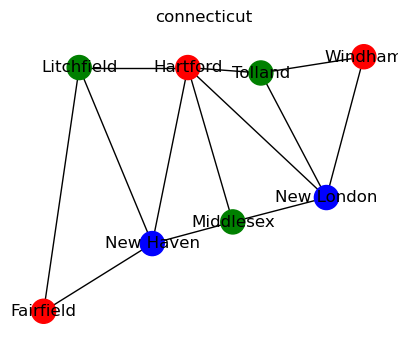

In [23]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

<a id="three_ct"></a>
## Does the Four Color Theorem apply here?

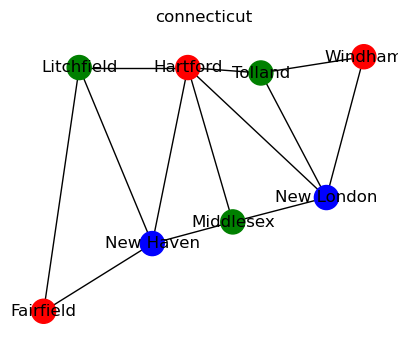

In [24]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=False)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

*Connecticut can be colored successfully with 3 colors, but likely only because of its simplicity. We can see from the trace statements that backtracking isn't fully necessary, as no domain is emptied completely.*

## Problem 2. Color Europe Using Your solution

In [25]:
europe = {
    'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57),
                 (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32),
                 (94, 97), (143, 149), (140, 111), (110, 67), (127, 40),
                 (118, 47), (111, 54), (189, 39), (202, 33), (82, 74),
                 (110, 162), (137, 102), (93, 55), (125, 32), (128, 37),
                 (122, 42), (116, 53), (124, 65), (146, 87), (138, 54),
                 (137, 41), (64, 90), (130, 22), (168, 29), (78, 55),
                 (116, 144), (122, 57), (158, 65), (122, 78), (112, 60),
                 (127, 48), (191, 118), (100, 78), (102, 35)],
 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22),
           (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24),
           (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12),
           (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37),
           (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23),
           (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30),
           (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 39),
           (15, 41), (15, 29), (41, 4), (41, 24), (41, 45), (41, 18), (41, 38),
           (41, 29), (4, 24), (24, 45), (45, 1), (45, 34), (45, 25), (45, 27),
           (45, 17), (45, 28), (45, 18), (34, 25), (34, 26), (34, 32), (34, 6),
           (34, 35), (25, 26), (25, 16), (25, 27), (26, 16), (26, 42), (26, 32),
           (16, 27), (16, 42), (27, 17), (27, 42), (17, 42), (17, 28), (42, 28),
           (42, 38), (42, 31), (42, 32), (28, 18), (28, 38), (18, 38), (38, 29),
           (38, 39), (38, 31), (29, 39), (30, 39), (30, 43), (39, 5), (39, 31),
           (39, 43), (5, 31), (31, 32), (32, 35), (6, 35), (35, 19), (35, 11),
           (35, 20), (19, 11), (19, 20), (19, 43), (11, 20), (20, 43)],
 'nodes': ['Portugal', 'Malta', 'Iceland', 'Ireland', 'Liechtenstein',
           'Moldova', 'Cyprus', 'Spain', 'Netherlands', 'Luxembourg',
           'Lithuania', 'Armenia', 'Denmark', 'Finland', 'Estonia',
           'Czech Republic', 'Kosovo', 'Bosnia Herzegovina', 'Slovenia',
           'Georgia', 'Azerbaijan', 'Belgium', 'Norway', 'Latvia',
           'Switzerland', 'Albania', 'Macedonia', 'Montenegro', 'Croatia',
           'Slovakia', 'Belarus', 'Romania', 'Bulgaria', 'United Kingdom',
           'Greece', 'Turkey', 'France', 'Sweden', 'Hungary', 'Ukraine',
           'Poland', 'Austria', 'Serbia', 'Russia', 'Germany', 'Italy']}
print(europe)

{'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57), (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32), (94, 97), (143, 149), (140, 111), (110, 67), (127, 40), (118, 47), (111, 54), (189, 39), (202, 33), (82, 74), (110, 162), (137, 102), (93, 55), (125, 32), (128, 37), (122, 42), (116, 53), (124, 65), (146, 87), (138, 54), (137, 41), (64, 90), (130, 22), (168, 29), (78, 55), (116, 144), (122, 57), (158, 65), (122, 78), (112, 60), (127, 48), (191, 118), (100, 78), (102, 35)], 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22), (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24), (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12), (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37), (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23), (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30), (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 

In [26]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Selecting  Italy  with degree count  11
Proposed Values, soted by least constraining:  ['red', 'blue', 'green', 'yellow']
Assignment made:  Italy ,  red
Selecting  Germany  with degree count  10
Proposed Values, soted by least constraining:  ['red', 'blue', 'green', 'yellow']
Assignment made:  Germany ,  red
Selecting  Russia  with degree count  8
Proposed Values, soted by least constraining:  ['red', 'blue', 'green', 'yellow']
Assignment made:  Russia ,  red
Selecting  Serbia  with degree count  8
Proposed Values, soted by least constraining:  ['red', 'blue', 'green', 'yellow']
Assignment made:  Serbia ,  red
Selecting  Austria  with degree count  8
Proposed Values, soted by least constraining:  ['blue', 'green', 'yellow']
Assignment made:  Austria ,  blue
Selecting  Poland  with degree count  8
Proposed Values, soted by least constraining:  ['blue', 'green', 'yellow']
Assignment made:  Poland ,  blue
Selecting  Ukraine  with degree count  7
Proposed Values, soted by least constrainin

Here we're testing to see if the adjacent nodes are colored differently:

<a id="four_eu"></a>
#### Test Cases

In [27]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

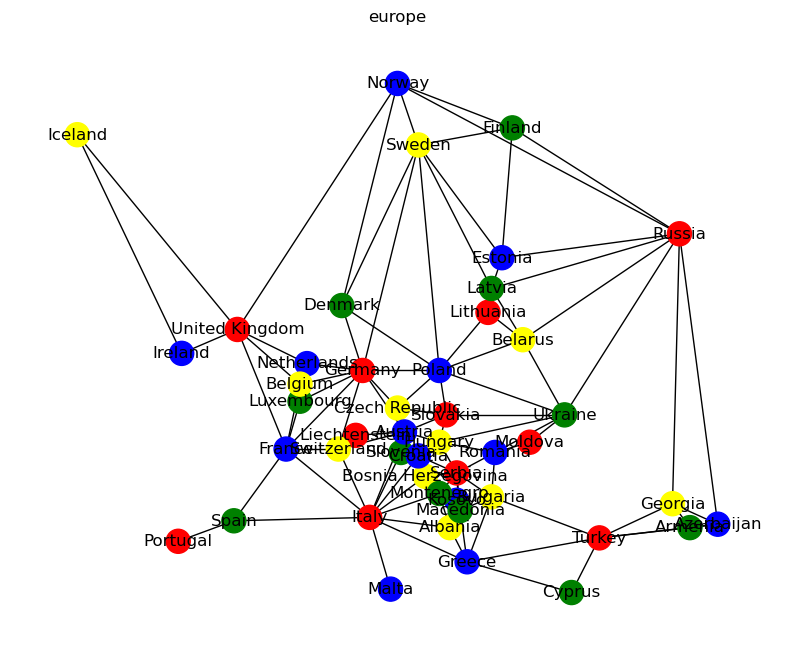

In [28]:
draw_map("europe", europe, (10,8), europe_colors)

<a id="three_eu"></a>
## Does the Four Color Theorem apply here?

In [29]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=False)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

No solution could be found with the given constraints


*I believe this is due to the complexity and size of the network. As shown above, Connecticut can be colored with 3 colors because of its simplicity, but Europe cannot.*

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.